In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hàm hiển thị ảnh
def display_image(data, title, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Hàm lưu ảnh
def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')  # Tắt các trục
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  # Đảm bảo không giữ các hình vẽ mở

In [3]:
# Bước 1: Khởi tạo các hằng số và thông số
size = 8  # Kích thước ảnh (8x8)
TwoPiOnSize = 2.0 * np.pi / size  # 2 * pi / size
u1 = v1 = 1.5  # Tần số ngang và dọc

In [4]:
# Bước 2: Tạo các mảng cho phần thực và ảo
I5R = np.zeros((size, size), dtype=float)  # Phần thực của I5
I5I = np.zeros((size, size), dtype=float)  # Phần ảo của I5

In [5]:
# Bước 3: Tính toán các giá trị pixel
for row in range(size):
    for col in range(size):
        Phase = TwoPiOnSize * (u1 * col + v1 * row)
        I5R[row, col] = np.cos(Phase)  # Phần thực
        I5I[row, col] = 0.0  # Phần ảo bằng 0

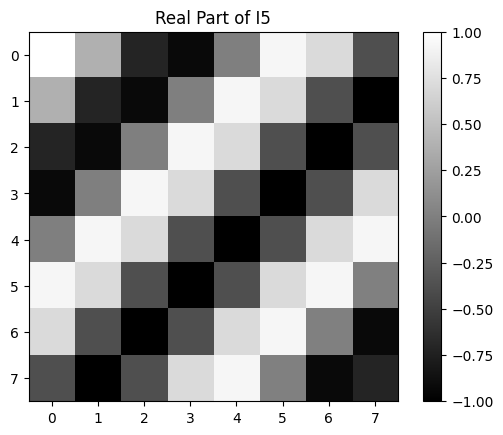

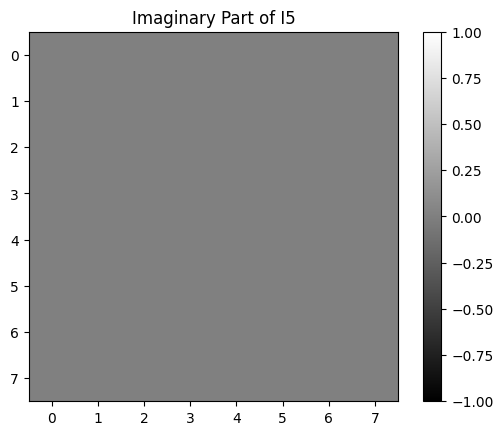

In [6]:
# Bước 4: Hiển thị ảnh phần thực và phần ảo của I5
display_image(I5R, 'Real Part of I5', cmap='gray', vmin=-1, vmax=1)
display_image(I5I, 'Imaginary Part of I5', cmap='gray', vmin=-1, vmax=1)

# Lưu ảnh phần thực và phần ảo của I5
save_image(I5R, 'real_I5.png', cmap='gray', vmin=-1, vmax=1)
save_image(I5I, 'imag_I5.png', cmap='gray', vmin=-1, vmax=1)

In [7]:
# Bước 5: Tính FFT 2D
DFT_I5 = np.fft.fftshift(np.fft.fft2(I5R + 1j * I5I))

In [8]:
# Tách phần thực và phần ảo của FFT
real_DFT_I5 = np.real(DFT_I5)
imag_DFT_I5 = np.imag(DFT_I5)

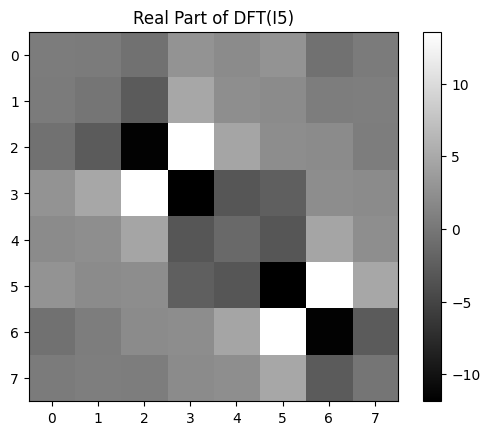

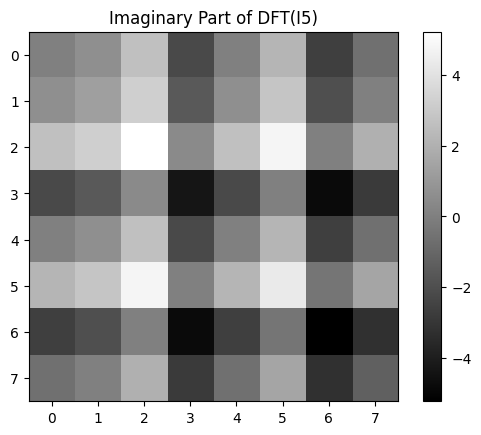

In [9]:
# Hiển thị FFT
display_image(real_DFT_I5, 'Real Part of DFT(I5)', cmap='gray')
display_image(imag_DFT_I5, 'Imaginary Part of DFT(I5)', cmap='gray')

# Lưu ảnh FFT phần thực và phần ảo của DFT(I5)
save_image(real_DFT_I5, 'real_DFT_I5.png', cmap='gray')
save_image(imag_DFT_I5, 'imag_DFT_I5.png', cmap='gray')

In [10]:
# Bước 6: In ra các giá trị ASCII
print("Re[DFT(I5)]:")
print(np.round(real_DFT_I5, 4))

print("\nIm[DFT(I5)]:")
print(np.round(imag_DFT_I5, 4))

Re[DFT(I5)]:
[[  0.5535   0.4335  -0.6131   2.9028   2.       2.9028  -0.6131   0.4335]
 [  0.4335  -0.1397  -2.7422   4.8284   2.2688   2.       0.6488   0.7023]
 [ -0.6131  -2.7422 -11.6569  13.5706   4.6131   2.1796   2.       0.6488]
 [  2.9028   4.8284  13.5706 -11.8603  -3.262   -2.3592   2.1796   2.    ]
 [  2.       2.2688   4.6131  -3.262   -1.2398  -3.262    4.6131   2.2688]
 [  2.9028   2.       2.1796  -2.3592  -3.262  -11.8603  13.5706   4.8284]
 [ -0.6131   0.6488   2.       2.1796   4.6131  13.5706 -11.6569  -2.7422]
 [  0.4335   0.7023   0.6488   2.       2.2688   4.8284  -2.7422  -0.1397]]

Im[DFT(I5)]:
[[ 0.      0.6488  2.6131 -2.1796  0.      2.1796 -2.6131 -0.6488]
 [ 0.6488  1.2977  3.262  -1.5307  0.6488  2.8284 -1.9643 -0.    ]
 [ 2.6131  3.262   5.2263  0.4335  2.6131  4.7927  0.      1.9643]
 [-2.1796 -1.5307  0.4335 -4.3592 -2.1796 -0.     -4.7927 -2.8284]
 [ 0.      0.6488  2.6131 -2.1796  0.      2.1796 -2.6131 -0.6488]
 [ 2.1796  2.8284  4.7927  0.      2.